In [0]:
!pip install pycaret

In [0]:
import pandas as pd

In [0]:
from pycaret.classification import *

In [0]:
url = 'https://raw.githubusercontent.com/nukemecha/Project3/master/cleaned_2011.csv'
df = pd.read_csv(url)

In [0]:
df=df.replace(to_replace="Fully Paid",value= 1)
df=df.replace(to_replace="Charged Off",value= 0)
df=df.replace(to_replace="Current", value = 1)
df=df.replace(to_replace="Default",value= 0)
df=df.replace(to_replace="Late (31-120 days)",value= 0)
df=df.replace(to_replace="In Grace Period",value= 0)
df=df.replace(to_replace="Late (16-30 days)",value= 0)


In [5]:
df.head()

loan_amnt  funded_amnt  ...  ver__Source Verified  ver__Verified
0       5000         5000  ...                     0              1
1       2500         2500  ...                     1              0
2       2400         2400  ...                     0              0
3      10000        10000  ...                     1              0
4       3000         3000  ...                     1              0

[5 rows x 56 columns]

In [0]:
df = df.rename(columns={'emp__< 1 year': 'emp__less1year', 'emp__10+ years': 'emp__10years'})

In [0]:
cols_to_drop = ['funded_amnt_inv', 'total_pymnt_inv']

In [14]:
df.drop(cols_to_drop, axis = 1, inplace = True)

loan_amnt  funded_amnt  ...  ver__Source Verified  ver__Verified
0       5000         5000  ...                     0              1
1       2500         2500  ...                     1              0
2       2400         2400  ...                     0              0
3      10000        10000  ...                     1              0
4       3000         3000  ...                     1              0

[5 rows x 54 columns]

In [15]:
exp_clf = setup(df, target = 'loan_status')

 
Setup Succesfully Completed!


In [16]:
compare_models()

In [17]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.9915  0.9958  0.9977  0.9923  0.9950  0.9664
1       0.9941  0.9942  0.9992  0.9938  0.9965  0.9767
2       0.9941  0.9939  1.0000  0.9931  0.9965  0.9767
3       0.9915  0.9878  0.9984  0.9915  0.9950  0.9663
4       0.9901  0.9883  1.0000  0.9885  0.9942  0.9605
5       0.9954  0.9916  1.0000  0.9946  0.9973  0.9818
6       0.9941  0.9907  0.9992  0.9938  0.9965  0.9767
7       0.9967  0.9937  0.9992  0.9969  0.9981  0.9872
8       0.9980  0.9991  1.0000  0.9977  0.9988  0.9923
9       0.9941  0.9953  0.9992  0.9938  0.9965  0.9767
Mean    0.9939  0.9930  0.9993  0.9936  0.9964  0.9761
SD      0.0023  0.0033  0.0007  0.0025  0.0014  0.0092

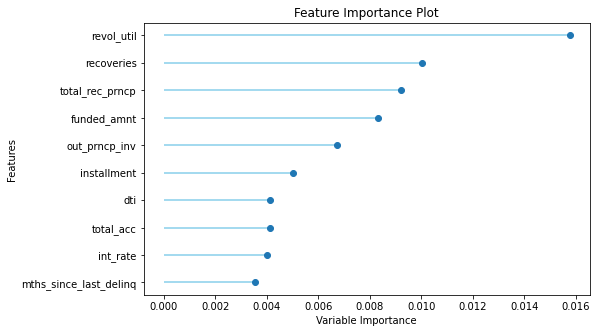

In [18]:
plot_model(lr, plot='feature')